# Flow Of Project
# 1 Import Data
# 2 Proprocess Data
# 3 Visualize Data
# 4 Train test split
# 5 Train Model and Avualivation
# 6 Prediction System with Web app

# Import Necessary Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
medical_df = pd.read_csv('insurance.csv')

In [31]:
medical_df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,2,7281.50560
8,37,0,29.830,2,1,3,6406.41070
9,60,1,25.840,0,1,2,28923.13692


# About the Data:
age: age of the insured person (numeric)                                          
sex: gender of the insured person (categorical: male/female)                                     
bmi: body mass index of the insured person (numeric)                                               
children: number of children covered by the insurance plan (numeric)                                  
smoker: whether or not the insured person is a smoker (categorical: yes/no)                                  
region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)                                            
charges: the insurance charges/costs billed to the insured person (numeric)                                                         

# Exploring Data & Analysing Data

In [5]:
medical_df.shape

(1338, 7)

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualisation

<Figure size 216x216 with 0 Axes>

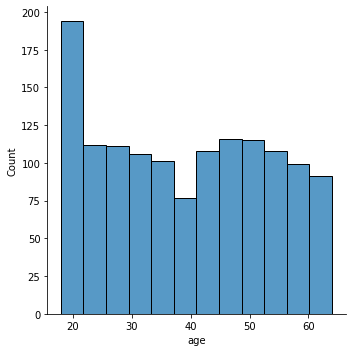

In [8]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<Figure size 216x216 with 0 Axes>

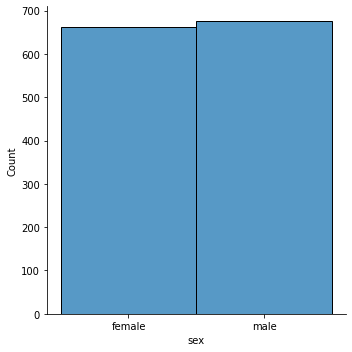

In [9]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')

In [10]:
medical_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 288x288 with 0 Axes>

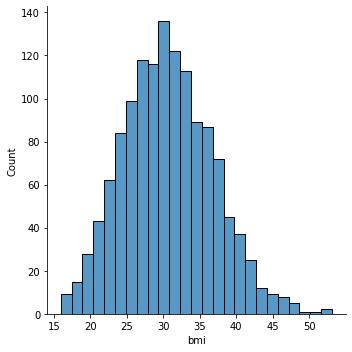

In [12]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
plt.show()

In [13]:
medical_df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

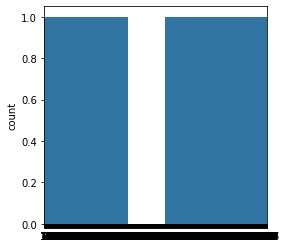

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(medical_df['children'])
plt.show()

In [15]:
medical_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

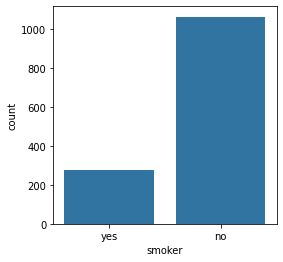

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

In [17]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# convert categorical column to numerical

In [18]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_31540\3958717934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_31540\3958717934.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_31540\3958717934.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [20]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Train Test Split

In [32]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [34]:
X_train.shape
X_train

,age,sex,bmi,children,smoker,region
7,37,1,27.740,3,1,2
597,34,1,33.250,1,1,3
226,28,0,38.060,0,1,0
263,19,0,36.955,0,0,2
1218,46,1,34.600,1,0,1
...,...,...,...,...,...,...
466,60,1,28.700,1,1,1
299,48,1,28.880,1,1,2
493,61,0,43.400,0,1,1
527,51,1,25.800,1,1,1


In [35]:
X_test.shape
X_test

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,1,3
1091,55,1,29.830,0,1,3
273,50,0,27.455,1,1,3
270,18,0,29.370,1,1,0
874,44,0,21.850,3,1,3
...,...,...,...,...,...,...
145,29,1,38.830,3,1,0
716,49,1,22.610,1,1,2
1038,22,0,28.880,0,1,3
490,19,1,32.900,0,1,1


In [25]:
lg = LinearRegression()
lg.fit(X_train,y_train) # 80 model will be train
y_pred = lg.predict(X_test) # 10 model will be predicted

In [26]:
r2_score(y_test,y_pred)

0.7058997983752826

# Prediction System